## Dram Data Upload 2

In [19]:
# Importing necessary libraries/modules
import os  # Provides functions for interacting with the operating system
import re  # Provides support for regular expressions
import datetime  # Provides classes for working with dates and times
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical computing
import matplotlib.pyplot as plt  # Library for creating visualizations
import pandas_gbq  # Library for interacting with Google BigQuery using pandas
import janitor  # Library for cleaning and transforming data
from google.cloud import bigquery  # Library for interacting with Google BigQuery
from google.oauth2 import service_account  # Library for working with service account credentials

### GBQ Set Up

In this next section we connect to our GBQ project and list the data sets inside to test the connection.

In [2]:
# Building the private key.

# This line assigns the string representing the path to the JSON file to the variable service_path. It specifies the 
# directory path where the JSON file is located.

service_path = "C:\\Users\\rsmcd\\OneDrive\\Desktop\\MSBA Fall 2022\\" # Path to json file.

# This line assigns the string representing the name of the JSON file to the variable service_file. It specifies the 
# name of the JSON file, including its extension.

service_file = 'reese-msba-9558fdd20984.json' # Name of json file.

# This line assigns the string representing the name of the Google BigQuery project to the variable gbq_proj_id. It 
# specifies the project ID associated with the Google BigQuery service.

gbq_proj_id = 'reese-msba' # Name of project.

# This line concatenates the service_path and service_file variables to form the complete file path to the JSON file. 
# It assigns this concatenated path string to the variable private_key. The private_key variable now holds the full 
# path to the JSON file, which can be used to authenticate and access the Google BigQuery service.

private_key =service_path + service_file # Creates single variable that leads to json file.                        

In [5]:
# A connection to Google BigQuery is established here using the credentials from a service account JSON file. The code then 
# lists the datasets available in the connected BigQuery project.

# Now we pass in our credentials so that Python has permission to access our project. This line uses the 
# from_service_account_file() method from the service_account module to create credentials for authentication. It takes 
# the complete file path to the service account JSON file (service_path + service_file) and generates the credentials 
# object.

credentials = service_account.Credentials.from_service_account_file(service_path + service_file)

# And finally we establish our connection. This line creates a BigQuery client object using the Client() constructor 
# from the bigquery module. It passes the credentials object and the gbq_proj_id as parameters to authenticate the 
# client connection. This establishes the connection to the specified BigQuery project.

client = bigquery.Client(credentials = credentials, project=gbq_proj_id)

# Look at list of data sets in client. This code block uses a for loop to iterate over the datasets in the connected 
# BigQuery project. The client.list_datasets() method retrieves a list of all datasets, and each item represents a 
# dataset. The item.full_dataset_id attribute is printed, which contains the full identifier of the dataset, including 
# the project ID and dataset name.

for item in client.list_datasets() : 
    print(item.full_dataset_id)

reese-msba:dram_shop
reese-msba:wedge_transactions


### Checking for and deleting monthly tables

We'll get all the tables in our Dram data set that match our pattern, then delete them. We do not want to accidentally delete the item lookup table that we put in this data set in class. 

In [6]:
# This line creates a regular expression pattern using the re.compile() function. The pattern dram_items_\d{8} matches 
# a string that starts with "dram_items_" and is followed by exactly eight digits.

ymd_pattern = re.compile(r"dram_items_\d{8}") # yearmonthday pattern.

# Let's break it down further:

# dram_items_: This part of the pattern matches the literal characters "dram_items_".
# \d{8}: This part of the pattern matches exactly eight digits (0-9). The \d is a shorthand notation for matching digits, 
# and {8} specifies that there should be exactly eight digits.
# By compiling the regular expression pattern using re.compile(), you can use it later for matching and searching 
# operations.

# Regular expressions are powerful tools for pattern matching in strings. They allow you to define complex patterns and 
# perform operations like matching, searching, replacing, and more. In this case, the ymd_pattern is designed to match 
# strings that follow the format "dram_items_YYYYMMDD", where YYYY represents the year, MM represents the month, and DD 
# represents the day.

In [7]:
# This line uses the search() method of the regular expression pattern ymd_pattern to search for a match within the 
# string "dram_items_". It checks if the pattern matches the string.

ymd_pattern.search("dram_items_")

# This line uses the search() method of the ymd_pattern regular expression object to search for a match within the 
# provided string.

# In this case, the string "dram_items_" does not contain the required eight digits at the end to match the pattern 
# dram_items_\d{8}. Therefore, the search() method will not find a match, and it will return a None value.

In [8]:
# These lines retrieve a list of tables within the dram_shop dataset using the list_tables() method of the Google 
# BigQuery client. The list of tables is stored in the tables variable.

dataset_id = 'dram_shop'
tables = client.list_tables(dataset_id)  # Store list of tables from dataset_id.

# This loop iterates over each table in the tables list. For each table, it prints a message indicating that it 
# is "Looking at" the table's ID.

for table in tables:
    
    print(f'Looking at {table.table_id}')

    # Test to see if table.table_id matches the pattern.
    # If so, delete it.

In [10]:
# This code accesses the table_id attribute of the table object. In the context of the provided code snippet, table 
# represents an individual table within a dataset. By accessing the table_id attribute, you retrieve the ID or name of 
# that table.

table.table_id

'item_lookup'

In [11]:
# These lines of code will delete all tables that match our regular expression table pattern.
# Looking for tables in the list of tables pulled from our gbq connection.

# This line initiates a loop that iterates over the tables within the specified dataset (dataset_id) using the 
# client.list_tables() method.

for table in client.list_tables(dataset_id) :
    
    # This line checks if the table_id of the current table in the loop matches the ymd_pattern regular expression 
    # pattern using the search() method. The table_id is accessed using table.table_id.
    
    if ymd_pattern.search(table.table_id):
        
        # If the table_id matches the pattern, the code proceeds inside the if statement. It constructs the full 
        # table_id by joining the project ID (gbq_proj_id), dataset ID (dataset_id), and the table_id of the current 
        # table. Then, it calls the client.delete_table() method to delete the table with the specified table_id. 
        # The not_found_ok=True parameter allows the deletion to succeed even if the table does not exist. Finally, it 
        # prints a message indicating that the table with the specific table_id has been deleted.
        
        table_id = ".".join([gbq_proj_id,dataset_id,table.table_id])
        client.delete_table(table_id, not_found_ok=True)
        print(f"Deleted {table_id}.")

Deleted reese-msba.dram_shop.dram_items_20150101.
Deleted reese-msba.dram_shop.dram_items_20150301.
Deleted reese-msba.dram_shop.dram_items_20150401.
Deleted reese-msba.dram_shop.dram_items_20150501.
Deleted reese-msba.dram_shop.dram_items_20150601.
Deleted reese-msba.dram_shop.dram_items_20150701.
Deleted reese-msba.dram_shop.dram_items_20150801.
Deleted reese-msba.dram_shop.dram_items_20150901.
Deleted reese-msba.dram_shop.dram_items_20151001.
Deleted reese-msba.dram_shop.dram_items_20151101.
Deleted reese-msba.dram_shop.dram_items_20151201.
Deleted reese-msba.dram_shop.dram_items_20160101.
Deleted reese-msba.dram_shop.dram_items_20160201.
Deleted reese-msba.dram_shop.dram_items_20160301.
Deleted reese-msba.dram_shop.dram_items_20160401.
Deleted reese-msba.dram_shop.dram_items_20160501.
Deleted reese-msba.dram_shop.dram_items_20160601.
Deleted reese-msba.dram_shop.dram_items_20160701.
Deleted reese-msba.dram_shop.dram_items_20160801.
Deleted reese-msba.dram_shop.dram_items_20160901.


In [12]:
# To obtain a list of tables within a dataset using the Google BigQuery client, you can use the list_tables() method and 
# convert the returned iterator to a list.

list(client.list_tables(dataset_id))

### Reading in and uploading montly tables

In [13]:
# Here's a function to transform the date column in a dataframe to the YYYYMM01 format we'd like to use for subsetting.

# This line defines the function reformat_date that takes a date_string as input.

def reformat_date(date_string) :
    
    # This line uses the strptime() function from the datetime module to convert the date_string into a datetime 
    # object. The format "%Y-%m-%d" specifies the expected format of the date_string as "YYYY-MM-DD".
    
    date_string = datetime.datetime.strptime(date_string,"%Y-%m-%d")
    
    # This line converts the date_string (now a datetime object) into a formatted string using the strftime() function. 
    # The format "%Y%m" extracts the year and month from the datetime object and formats them as "YYYYMM". Then, "01" 
    # is appended to represent the first day of that month.
    
    return(datetime.date.strftime(date_string,"%Y%m")+"01")

# These lines assert that the function reformat_date behaves as expected by comparing its output with the expected 
# reformatted date strings. If the function returns the expected output, the assertions pass silently. If the function's 
# output does not match the expected value, an exception is raised.

assert(reformat_date("2022-09-20")=="20220901")
assert(reformat_date("2000-10-20")=="20001001")

In [14]:
# Build function for removing $'s and ,'s.

# This line defines a function named clean_amounts that takes one parameter x.

def clean_amounts(x):
    
    # Within the function, this line replaces all occurrences of the dollar sign ($) in the value of x with an empty 
    # string (""). It removes the dollar sign from the input.
    
    x = x.replace("$","")
    
    # This line replaces all occurrences of commas (,) in the value of x with an empty string (""). It removes the 
    # commas from the input.
    
    x = x.replace(",","")
    
    # This line returns the modified value of x as the result of the function.
    
    return(x)

# This line defines a function named empty_sku that takes one parameter x.

def empty_sku(x):
    
    # Within the function, this line replaces all occurrences of the string "nan" in the value of x with an empty 
    # string (""). It removes the occurrences of "nan" from the input.
    
    x = x.replace("nan","")
    
    # This line replaces all occurrences of the string "Goblet" in the value of x with an empty string (""). It 
    # removes the occurrences of "Goblet" from the input.
    
    x = x.replace("Goblet","")
    
    # This line returns the modified value of x as the result of the function.
    
    return(x)

print(clean_amounts("$987.00"))

987.00


1. Read in the items files one at a time.
2. Do the same cleaning we did in Part 1 (clean names, 
   make sku an empty string, fix dollars, make modifiers_applied a string)
3. For each month in the file, subset the data to that month and 
   upload the data to a table called `dram_items_YYYYMM01`. 

In [15]:
# Create a list of file names in dram-items.

file_names = os.listdir("dram-items")
print(file_names)

['items-2015-01-01-2016-01-01.csv', 'items-2016-01-01-2017-01-01.csv', 'items-2017-01-01-2018-01-01.csv', 'items-2018-01-01-2019-01-01.csv', 'items-2019-01-01-2020-01-01.csv', 'items-2020-01-01-2021-01-01.csv', 'items-2021-01-01-2022-01-01.csv', 'items-2022-01-01-2022-10-01.csv', 'items-2022-01-01-2023-01-01.csv']


In [16]:
# This line initiates a loop that iterates over a list of file names stored in the file_names variable.

for file in file_names :
    
    # Within the loop, this line reads a CSV file named file from the "dram-items" directory using pd.read_csv(). The 
    # file path is constructed by concatenating the directory name and the current file name.
    
    dram_items = pd.read_csv('dram-items\\'+file)
    
    # This line applies the clean_names() function from the janitor library to clean the column names of the 
    # dram_items DataFrame. The function helps standardize and clean column names by removing whitespace, special 
    # characters, and converting them to lowercase.
    
    dram_items = janitor.clean_names(dram_items)
    
    # These lines convert the selected columns (gross_sales, discounts, net_sales, and tax) in the dram_items DataFrame 
    # to numeric data types using pd.to_numeric(). Before conversion, the clean_amounts() function is applied to each 
    # column using the map() method to remove any dollar signs or commas from the values.
    
    dram_items['gross_sales']=pd.to_numeric(dram_items['gross_sales'].map(clean_amounts))
    dram_items['discounts']=pd.to_numeric(dram_items['discounts'].map(clean_amounts))    
    dram_items['net_sales']=pd.to_numeric(dram_items['net_sales'].map(clean_amounts))    
    dram_items['tax']=pd.to_numeric(dram_items['tax'].map(clean_amounts))
    
    # These lines convert the modifiers_applied and sku columns in the dram_items DataFrame to string data types using 
    # astype(). Additionally, the empty_sku() function is applied to the sku column using the map() method to remove 
    # specific substrings from the values.
    
    dram_items.modifiers_applied = dram_items.modifiers_applied.astype('str')   
    dram_items.sku = dram_items.sku.astype('str').map(empty_sku)
    
    # This line creates a new column named "ym" in the dram_items DataFrame. The values in this column are derived by 
    # applying the reformat_date() function to the date column of dram_items. The reformat_date() function reformats 
    # the date strings in the format "YYYY-MM-DD" to "YYYYMM01".
    
    dram_items["ym"] = dram_items.date.map(reformat_date)
    
    # This line extracts the unique values from the "ym" column of the dram_items DataFrame and converts them to a 
    # list. The resulting ym_list contains the unique year-month values extracted from the "ym" column.
    
    ym_list = dram_items.ym.unique().tolist()
    
    # This line initiates a loop that iterates over the ym_list, which contains the unique year-month values.
    
    for ym in ym_list:
        
        # Within the loop, these lines create a query string (qry) to filter the dram_items DataFrame for a specific 
        # year-month (ym). The query() method is then used to filter the DataFrame based on the query string, resulting 
        # in a new DataFrame called dram_ym that contains data only for the current year-month.
        
        qry = f'ym == "{ym}"'
        dram_ym = dram_items.query(qry)
        
        # These lines define the table name (table_name) using the current year-month value, and set the project ID 
        # (gbq_proj_id), dataset ID (dataset_id), and the full table ID (table_id) by joining them together with 
        # periods (.).
        
        table_name = (f'dram_items_{ym}')       
        gbq_proj_id = 'reese-msba'        
        dataset_id = 'dram_shop'
        table_id = ".".join([gbq_proj_id,dataset_id,table_name])   
        
        # This line uses the to_gbq() function from the pandas_gbq library to write the dram_ym DataFrame into a 
        # BigQuery table with the specified table ID (table_id). The project ID (gbq_proj_id) is provided as the 
        # project_id parameter, and the if_exists parameter is set to "replace" to overwrite the table if it already 
        # exists.
        
        pandas_gbq.to_gbq(dram_ym, table_id, project_id=gbq_proj_id,if_exists="replace")

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]
C:\Users\rsmcd\AppData\Local\Temp\ipykernel_7648\2524803033.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dram_items = pd.read_csv('dram-items\\'+file)
100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]
C:\Users\rsmcd\AppData\Local\Temp\ipykernel_7648\2524803033.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dram_items = pd.read_csv('dram-items\\'+file)
100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]
C:\Users\rsmcd\AppData\Local\Temp\ipykernel_7648\2524803033.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dram_items = pd.read_csv('dram-items\\'+file

### Querying the Results

In this section, write a query that returns the number of records per month across all of your tables and plot those results by month.

In [ ]:
# Bring gbq dataframe into pandas.

# This multi-line string defines the BigQuery query to be executed. The query selects the substring of the date column, 
# representing the year and month (in the format "YYYY-MM"), as year_month. It also counts the number of rows (count(*)) 
# for each distinct year and month. The table pattern dram_items_* is used as the data source, where the asterisk (*) is 
# a wildcard representing multiple tables with names starting with "dram_items_". The result is grouped by year_month and 
# ordered by year_month.

rows_per_month_query = """
    SELECT substr(date, 1, 7) as year_month
    , count(*) as num_rows
    FROM `reese-msba.dram_shop.dram_items_*`
    GROUP BY year_month
    ORDER BY year_month
"""

# This line executes the BigQuery query using the read_gbq() function from the pandas_gbq library. The 
# rows_per_month_query is passed as the query parameter, and the project_id is provided for specifying the project to 
# execute the query in. The result of the query is returned as a pandas DataFrame assigned to the variable rows_per_month.

rows_per_month = pandas_gbq.read_gbq(rows_per_month_query,project_id = gbq_proj_id)

In [22]:
rows_per_month

,year_month,num_rows
0,2015-01,1
1,2015-03,1672
2,2015-04,8325
3,2015-05,7545
4,2015-06,6610
...,...,...
87,2022-05,13144
88,2022-06,13003
89,2022-07,12684
90,2022-08,11400


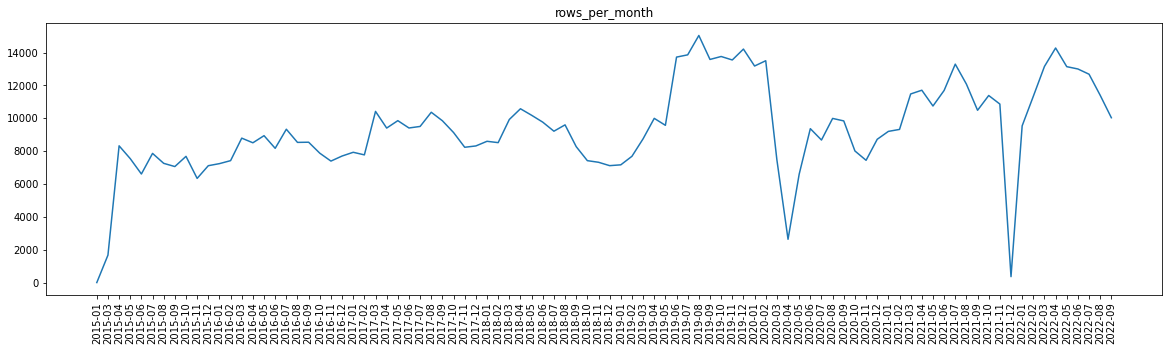

In [39]:
# Build a plot that shows rows per month.

plt.rcParams['figure.figsize'] = 20,5
df = rows_per_month
df = df.sort_values('year_month', ascending=True)
plt.plot(df['year_month'], df['num_rows'])
plt.xticks(rotation='vertical')
plt.title('rows_per_month')
plt.show()